In [1]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

1.15.0


In [0]:
from tensorflow import keras

In [0]:
import numpy as np

In [0]:
import matplotlib.pyplot as plt

- https://github.com/zalandoresearch/fashion-mnist

In [0]:
dataset = keras.datasets.fashion_mnist

((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

In [5]:
imagens_treino[:2]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [6]:
len(imagens_treino)

60000

In [7]:
imagens_treino.shape

(60000, 28, 28)

In [8]:
imagens_teste.shape

(10000, 28, 28)

In [9]:
len(identificacoes_treino)

60000

Text(0.5, 1.0, '9')

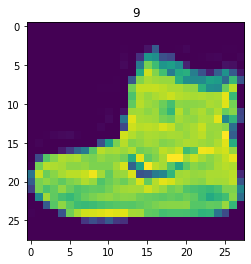

In [10]:
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

Text(0.5, 1.0, '0')

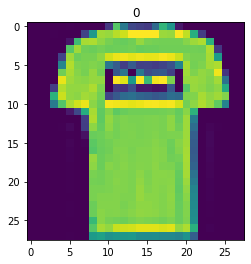

In [11]:
plt.imshow(imagens_treino[1])
plt.title(identificacoes_treino[1])

In [12]:
identificacoes_treino.min()

0

In [13]:
identificacoes_treino.max()

9

In [14]:
total_classificacoes = identificacoes_treino.max() - identificacoes_treino.min() + 1
total_classificacoes

10

In [15]:
nomes_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco',
                        'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']
#nomes_classificacoes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
#                        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
nomes_classificacoes

['Camiseta',
 'Calça',
 'Pullover',
 'Vestido',
 'Casaco',
 'Sandália',
 'Camisa',
 'Tênis',
 'Bolsa',
 'Bota']

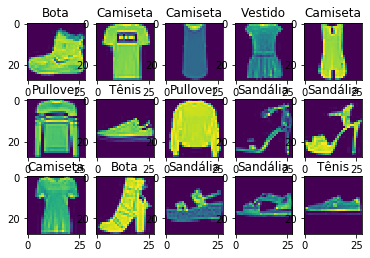

In [16]:
for imagem in range(15):
  plt.subplot(3, 5, imagem + 1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_classificacoes[identificacoes_treino[imagem]])

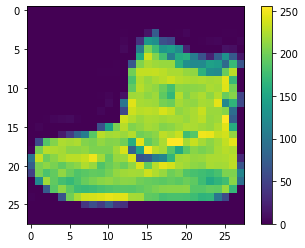

In [17]:
plt.imshow(imagens_treino[0])
plt.colorbar()

In [18]:
modelo = keras.Sequential([

    # entrada (camada 0)
    keras.layers.Flatten(input_shape=(28, 28)), # achatar imagens de 28 x 28 pixels

    # processamento (camada 1)
    keras.layers.Dense(256, activation=tf.nn.relu), # função ReLU (não-linear)

    # saída (camada 2)
    keras.layers.Dense(10, activation=tf.nn.softmax) # 10 categorias
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [19]:
modelo

In [0]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

In [21]:
modelo.fit(imagens_treino, identificacoes_treino) # loss: 3.9652

Train on 60000 samples
60000/60000 [==============================] - 6s 108us/sample - loss: 3.9099


In [0]:
# normalizar imagens para diminuir a perda
imagens_treino = imagens_treino / float(255)

In [22]:
modelo.fit(imagens_treino, identificacoes_treino) # loss: 0.8597

Train on 60000 samples
60000/60000 [==============================] - 6s 105us/sample - loss: 0.9202


In [0]:
modelo = keras.Sequential([

    # entrada (camada 0)
    keras.layers.Flatten(input_shape=(28, 28)), # achatar imagens de 28 x 28 pixels

    # processamento (camadas ocultas)
    keras.layers.Dense(256, activation=tf.nn.relu), # função ReLU (não-linear)
    keras.layers.Dense(128, activation=tf.nn.relu), # função ReLU (não-linear)

    # saída (camada N)
    keras.layers.Dense(10, activation=tf.nn.softmax) # 10 categorias
])
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

In [24]:
modelo.fit(imagens_treino, identificacoes_treino) # loss: 0.4755

Train on 60000 samples
60000/60000 [==============================] - 8s 133us/sample - loss: 0.4797


In [0]:
modelo = keras.Sequential([

    # entrada (camada 0)
    keras.layers.Flatten(input_shape=(28, 28)), # achatar imagens de 28 x 28 pixels

    # processamento (camadas ocultas)
    keras.layers.Dense(256, activation=tf.nn.relu), # função ReLU (não-linear)
    keras.layers.Dense(128, activation=tf.nn.relu), # função ReLU (não-linear)
    keras.layers.Dense(64, activation=tf.nn.relu), # função ReLU (não-linear)

    # saída (camada N)
    keras.layers.Dense(10, activation=tf.nn.softmax) # 10 categorias
])
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

In [26]:
modelo.fit(imagens_treino, identificacoes_treino) # loss: 0.4839 => não está mais ajudando incluir camadas!!!

Train on 60000 samples
60000/60000 [==============================] - 8s 137us/sample - loss: 0.4884


In [27]:
# aumentar quantidade de épocas
modelo.fit(imagens_treino, identificacoes_treino, epochs=5) # loss: 0.2755

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 127us/sample - loss: 0.3670
Epoch 2/5
60000/60000 [==============================] - 8s 132us/sample - loss: 0.3313
Epoch 3/5
60000/60000 [==============================] - 8s 129us/sample - loss: 0.3087
Epoch 4/5
60000/60000 [==============================] - 8s 127us/sample - loss: 0.2875
Epoch 5/5
60000/60000 [==============================] - 8s 131us/sample - loss: 0.2755


In [0]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
# executar 5 épocas e separar 20% para validação
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2) # loss: 0.2220

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 8s 156us/sample - loss: 0.2643 - acc: 0.9014 - val_loss: 0.2635 - val_acc: 0.9003
Epoch 2/5
48000/48000 [==============================] - 7s 147us/sample - loss: 0.2483 - acc: 0.9066 - val_loss: 0.2548 - val_acc: 0.9053
Epoch 3/5
48000/48000 [==============================] - 7s 147us/sample - loss: 0.2375 - acc: 0.9107 - val_loss: 0.2756 - val_acc: 0.9001
Epoch 4/5
48000/48000 [==============================] - 7s 145us/sample - loss: 0.2293 - acc: 0.9125 - val_loss: 0.2642 - val_acc: 0.9028
Epoch 5/5
48000/48000 [==============================] - 8s 159us/sample - loss: 0.2220 - acc: 0.9156 - val_loss: 0.2790 - val_acc: 0.8998


In [40]:
id_teste = 1
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[id_teste]))
print('número da imagem de teste:', identificacoes_teste[id_teste])

resultado teste: 2
número da imagem de teste: 2


In [41]:
# avaliar como o modelo está indo com os dados de teste, fornecendo os dados de acurácia e perda
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste * 100)

10000/10000 [==============================] - 1s 57us/sample - loss: 52.3752 - acc: 0.8697
Perda do teste: 52.37515555126667
Acurácia do teste: 86.9700014591217


In [42]:
historico.history

{'acc': [0.9013542, 0.9065833, 0.91072917, 0.9125208, 0.9155625],
 'loss': [0.2643061601171891,
  0.24832954202281932,
  0.23752813036367298,
  0.229294235293443,
  0.22203463213704527],
 'val_acc': [0.90033334, 0.90525, 0.90008336, 0.90283334, 0.8998333],
 'val_loss': [0.2634658582955599,
  0.25477599358558656,
  0.27561487013101577,
  0.26415921112398305,
  0.27902993551890054]}

In [44]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # entrada (camada 0)
    keras.layers.Dense(256, activation=tf.nn.relu), # (camada 1)
    keras.layers.Dropout(0.2), # para normalizar o modelo (camada 2)
    keras.layers.Dense(10, activation=tf.nn.softmax) # saída (camada 3)
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# gravar o histórico de treino do modelo
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 7s 150us/sample - loss: 0.5302 - acc: 0.8135 - val_loss: 0.4255 - val_acc: 0.8495
Epoch 2/5
48000/48000 [==============================] - 7s 145us/sample - loss: 0.4020 - acc: 0.8555 - val_loss: 0.3715 - val_acc: 0.8641
Epoch 3/5
48000/48000 [==============================] - 7s 147us/sample - loss: 0.3641 - acc: 0.8670 - val_loss: 0.3583 - val_acc: 0.8709
Epoch 4/5
48000/48000 [==============================] - 7s 144us/sample - loss: 0.3416 - acc: 0.8748 - val_loss: 0.3311 - val_acc: 0.8817
Epoch 5/5
48000/48000 [==============================] - 7s 143us/sample - loss: 0.3239 - acc: 0.8810 - val_loss: 0.3321 - val_acc: 0.8789


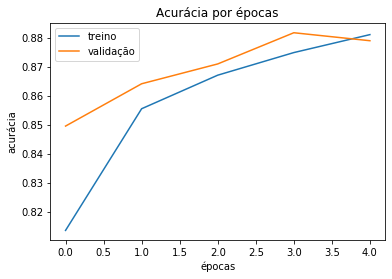

In [46]:
# visualizar a acurácia de treino e validação
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

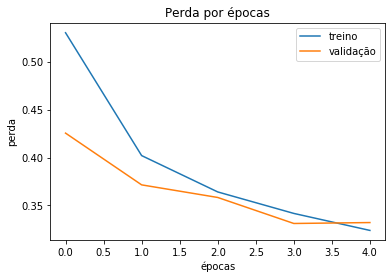

In [47]:
# visualizar a perda de treino e validação
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [50]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste * 100)

10000/10000 [==============================] - 1s 65us/sample - loss: 52.8880 - acc: 0.8590
Perda do teste: 52.88804312095642
Acurácia do teste: 85.9000027179718


In [0]:
from tensorflow.keras.models import load_model

modelo.save('modelo.h5') # gravar no formato HDF5
modelo_salvo = load_model('modelo.h5')

In [52]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

resultado teste: 2
número da imagem de teste: 2
resultado teste modelo salvo: 2
número da imagem de teste: 2
